In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os


data = pd.read_csv("./data/cleveland_final.csv")

In [2]:
column_list = data.columns
for i in column_list:
    print("Values of",i,"column\n",data[i].unique())
    print("--------------\n")
    
data.describe()

Values of age column
 [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
--------------

Values of sex column
 [1 0]
--------------

Values of cp column
 [1 4 3 2]
--------------

Values of trestbps column
 [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154]
--------------

Values of htn column
 [1 0]
--------------

Values of chol column
 [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,54.411348,0.677305,3.163121,131.563830,0.617021,249.092199,16.460993,14.829787,0.148936,-8.184397,...,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,1.127660,1.134752,1.411348,1.14539
std,9.053083,0.468338,0.955405,17.757496,0.486977,51.217546,19.580300,15.564563,0.356658,2.741802,...,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,0.334304,0.766002,1.439508,0.44257
min,29.000000,0.000000,1.000000,94.000000,0.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,55.000000,1.000000,3.000000,130.000000,1.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
75%,61.000000,1.000000,4.000000,140.000000,1.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,77.000000,1.000000,4.000000,200.000000,1.000000,564.000000,99.000000,54.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,4.00000


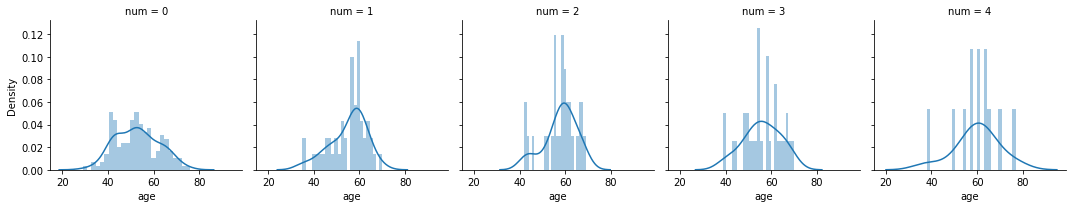

In [3]:
g = sns.FacetGrid(data, col = "num")
g.map(sns.distplot, "age", bins = 25)
plt.show()

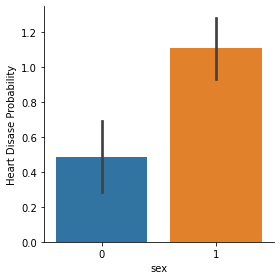

In [4]:
# Let's check the relationship of each column with heart disease
# we cant visualize each column, that would be meaningless so I'll create new list.
column_list2 = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

g = sns.factorplot(x = column_list2[0], y = "num", data = data, kind = "bar",size=4)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels(column_list2[0])
plt.show()

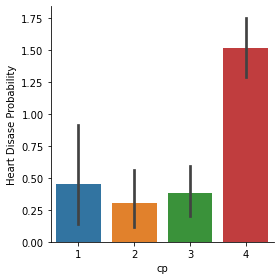

In [5]:
g = sns.factorplot(x = column_list2[1], y = "num", data = data, kind = "bar",size=4)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels(column_list2[1])
plt.show()

In [6]:
dummy_list = ["sex","cp","restecg","exang","slope","thal"]
data = pd.get_dummies(data,columns=dummy_list)
data.head()

,age,trestbps,htn,chol,cigs,years,fbs,dm,famhist,ekgmo,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_-9,thal_3,thal_6,thal_7
0,63,145,1,233,50,20,1,-9,1,2,...,1,1,0,0,0,1,0,0,1,0
1,67,160,1,286,40,40,0,-9,1,3,...,1,0,1,0,1,0,0,1,0,0
2,67,120,1,229,20,35,0,-9,1,2,...,1,0,1,0,1,0,0,0,0,1
3,37,130,0,250,0,0,0,-9,1,2,...,0,1,0,0,0,1,0,1,0,0
4,41,130,1,204,0,0,0,-9,1,2,...,1,1,0,1,0,0,0,1,0,0


In [4]:
# Import Machine Learning Libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
y = data.num.values
x_data = data.drop(["num"],axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

x_train 197
x_test 85
y_train 197
y_test 85


In [55]:
random_state = 42
classifier = [KNeighborsClassifier(),
              SVC(random_state = random_state,probability=True),
              DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             ]

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

svm_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}


classifier_param = [knn_param_grid,
                   svm_param_grid,
                    dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [56]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_ * 100)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 40 candidates, totalling 400 fits
68.47368421052632
Fitting 10 folds for each of 28 candidates, totalling 280 fits
87.76315789473684
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
82.18421052631581
Fitting 10 folds for each of 54 candidates, totalling 540 fits
77.07894736842104
Fitting 10 folds for each of 14 candidates, totalling 140 fits
83.26315789473684


Text(0.5, 1.0, 'Cross Validation Scores')

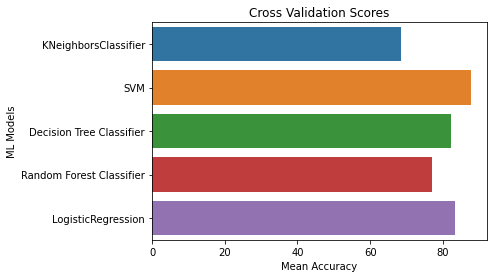

In [57]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "KNeighborsClassifier", "SVM","Decision Tree Classifier",
             "Random Forest Classifier","LogisticRegression",
            ]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [58]:
# We must detect the best k value of knn model so we will determine best_estimators list
best_estimators

[KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance'),
 SVC(C=200, gamma=0.01, probability=True, random_state=42),
 DecisionTreeClassifier(max_depth=7, min_samples_split=30, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=3,
                        random_state=42),
 LogisticRegression(C=1000.0, random_state=42)]

In [59]:
# We must find predicted values of each models. After that, we will compare with real values.
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(x_train, y_train)
y_head_knn = knn9.predict(x_test)

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
y_head_svm = svm.predict(x_test)

rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(x_train,y_train)
y_head_rf = rf.predict(x_test)

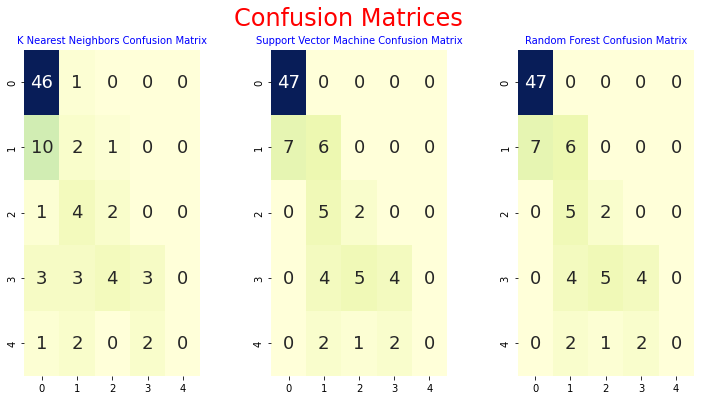

In [60]:
# We find confusion matrix of models below.
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_rf = confusion_matrix(y_test,y_head_rf)

# Let's visualize them
plt.figure(figsize=(12,6))
plt.suptitle("Confusion Matrices",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_knn,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,2)
plt.title("Support Vector Machine Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,3)
plt.title("Random Forest Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.show()

In [61]:
votingC = VotingClassifier(estimators = [("knn",best_estimators[0]),
                                        ("svm",best_estimators[1]),
                                        ("rf",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print("Accuracy of Ensemble: {:.2f}".format(accuracy_score(votingC.predict(x_test),y_test)*100))

Accuracy of Ensemble: 83.53


In [62]:
best_accuracies_each_classes = {}
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_lr_train = round(lr.score(x_train, y_train)*100,2) 
accuracy_lr_test = round(lr.score(x_test,y_test)*100,2)
best_accuracies_each_classes["Logistic Regression"] = lr.score(x_test,y_test)*100
print("Training Accuracy: {}%".format(accuracy_lr_train))
print("Testing Accuracy: {}%".format(accuracy_lr_test))

Training Accuracy: 94.92%
Testing Accuracy: 78.82%


Best Test KNN Score accuracy is: 65.88


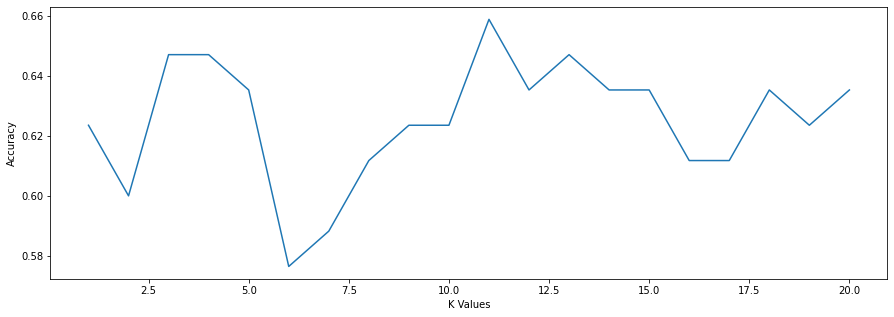

In [63]:
score_list_test = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    score_list_test.append(knn.score(x_test,y_test))
    
best_accuracies_each_classes["KNN"] = max(score_list_test)*100
print("Best Test KNN Score accuracy is: {:.2f}".format(max(score_list_test)*100))

plt.figure(figsize=(15,5))
plt.plot(range(1,21),score_list_test)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [64]:
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

best_accuracies_each_classes["SVM"] = svm.score(x_test,y_test)*100
print("Accuracy of SVM Algo: {:.2f}".format(svm.score(x_test,y_test)*100))

Accuracy of SVM Algo: 69.41


In [65]:
nb = GaussianNB()
nb.fit(x_train,y_train)

best_accuracies_each_classes["Naive Bayes"] = nb.score(x_test,y_test)*100
print("Accuracy of Naive Bayes: {:.2f}".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 76.47


In [66]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

best_accuracies_each_classes["Decision Tree"] = dt.score(x_test,y_test)*100
print("Accuracy of Decision Tree: {:.2f}".format(dt.score(x_test,y_test)*100))

Accuracy of Decision Tree: 84.71


In [67]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(x_train,y_train)

best_accuracies_each_classes["Random Forest"] = rf.score(x_test,y_test)*100
print("Accuracy of  Random Forest is: {:.2f}".format(rf.score(x_test,y_test)*100))

Accuracy of  Random Forest is: 76.47


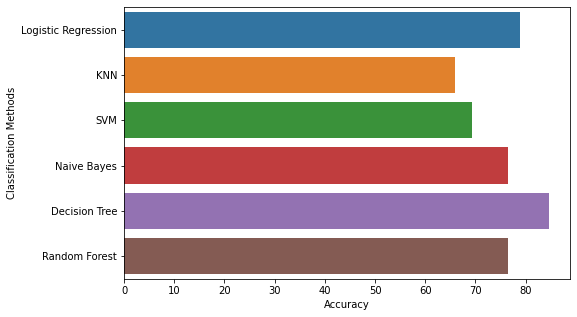

In [68]:
plt.figure(figsize=(8,5))
sns.barplot( y=list(best_accuracies_each_classes.keys()), x=list(best_accuracies_each_classes.values()))
plt.xlabel("Accuracy")
plt.ylabel("Classification Methods")
plt.show()

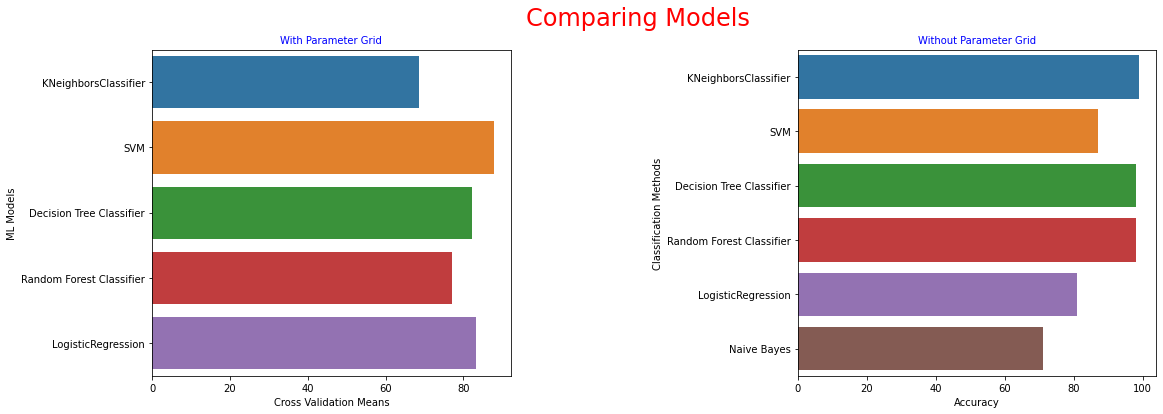

In [69]:
# I did not sort models ın an organized way so I filled by manually according to first graphic's sort.

cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "KNeighborsClassifier", "SVM","Decision Tree Classifier",
             "Random Forest Classifier","LogisticRegression",
            ]})

plt.figure(figsize=(18,6))
plt.suptitle("Comparing Models",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.8, hspace= 0.4)

plt.subplot(1,2,1)
plt.title("With Parameter Grid",fontsize=10,color="blue")
sns.barplot("Cross Validation Means", "ML Models", data = cv_results)


plt.subplot(1,2,2)
plt.title("Without Parameter Grid",fontsize=10,color="blue")
sns.barplot( y=['KNeighborsClassifier',
                 'SVM',
                 'Decision Tree Classifier',
                 'Random Forest Classifier',
                 'LogisticRegression',
                'Naive Bayes'] , x=[99.02597402597402,87.01298701298701,  98.05194805194806,98.05194805194806,80.84415584415584, 71.1038961038961])
plt.xlabel("Accuracy")
plt.ylabel("Classification Methods")
plt.show()

In [70]:
bt_df = pd.read_csv("./data/cleveland_final.csv")

x1 = bt_df[bt_df.columns.drop('num')]
y1 = bt_df['num']

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, train_size=0.6, test_size=0.4)
xtrain1, xcv1, ytrain1, ycv1 = train_test_split(xtrain1, ytrain1, train_size=0.75, test_size=0.25)


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.38      0.38      0.38         8
           2       0.00      0.00      0.00         4
           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         2

    accuracy                           0.67        43
   macro avg       0.31      0.33      0.32        43
weighted avg       0.61      0.67      0.64        43



array([0.5 , 0.56, 0.44, 0.44, 0.52])

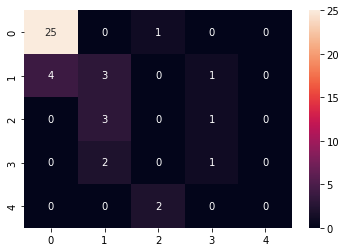

In [71]:
# scikit learn library
# Linear kernel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns


LsvmClassifier = SVC(kernel='linear', random_state=0)
LsvmClassifier.fit(xtrain1, ytrain1)
yprediction = LsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(LsvmClassifier, xtrain1, ytrain1, cv=5)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        26
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.60        43
   macro avg       0.12      0.20      0.15        43
weighted avg       0.37      0.60      0.46        43



array([0.53846154, 0.56      , 0.56      , 0.56      , 0.52      ])

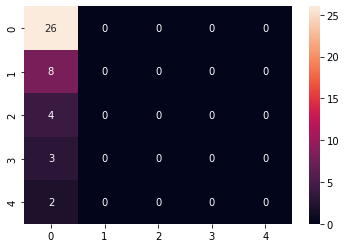

In [72]:
# scikit learn library
# Polynomial kernel

PsvmClassifier = SVC(kernel='poly', random_state=0)
PsvmClassifier.fit(xtrain1, ytrain1)
yprediction = PsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(PsvmClassifier, xtrain1, ytrain1, cv=5)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        26
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.60        43
   macro avg       0.12      0.20      0.15        43
weighted avg       0.37      0.60      0.46        43



array([0.53846154, 0.56      , 0.56      , 0.56      , 0.52      ])

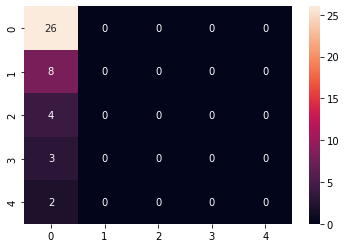

In [73]:
# scikit learn library
# RBF kernel

RsvmClassifier = SVC(kernel='rbf', random_state=0)
RsvmClassifier.fit(xtrain1, ytrain1)
yprediction = RsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(RsvmClassifier, xtrain1, ytrain1, cv=5)

In [74]:
# Implementing Grid Search Algorithm , 1000, solver: lbfgs 
param_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, 
              {'kernel': ['poly'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, 
              {'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}]


scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    
    clf = GridSearchCV(SVC(), param_grid, scoring='%s_macro' % score)

    clf.fit(xtrain1, ytrain1)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']          
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
         print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = ytest1, clf.predict(xtest1)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
Best parameters set found on development set:

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.290 (+/-0.093) for {'C': 1, 'kernel': 'linear'}
0.291 (+/-0.091) for {'C': 10, 'kernel': 'linear'}
0.291 (+/-0.091) for {'C': 100, 'kernel': 'linear'}
0.291 (+/-0.091) for {'C': 1000, 'kernel': 'linear'}
0.237 (+/-0.087) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 1000, 'gamma': 0.001, 'kernel': 'poly'}
0.237 (+/-0.087) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'poly'}
0.115 (+/-0.026) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.198 (+/-0.330) for {'C': 1, 'gamma':

In [77]:
# Best model params: C:10 kerbnel: linear
# Using validation to find the most wrong predictions. 
clf = SVC(kernel= 'linear', C=10)
clf.fit(xtrain1, ytrain1)
y_true, y_pred = ytest1, clf.predict(xtest1)

<AxesSubplot:title={'center':'SVM Confusion Matrix'}>

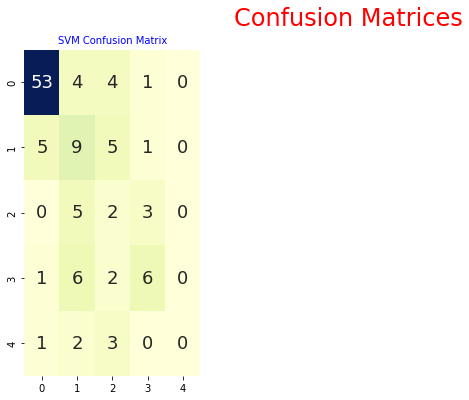

In [78]:
cm_svm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,6))
plt.suptitle("Confusion Matrices",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("SVM Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

In [19]:
'''
initialise another column called uncertainity

assign random values from [-1, 0, 1]

wrong predictions: 
  4: "2" - 3/0     - 1st   10
  3: "1" - 6/6     - 3rd    6
  2: "1" - 5/2     - 2nd    8
  1: "1" - 4/53, "2" - 4/53   - 4th  4
'''
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.classifier import StackingCVClassifier

heart_df = pd.read_csv('./data/cleveland_short.csv')
y = heart_df["num"]
x = heart_df.drop('num',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state = 0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))


m5 = 'K-NeighborsClassifier'
knn = DecisionTreeClassifier()
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))


m7 = 'Support Vector Classifier'
svc =  SVC(kernel='linear', C=10)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[16:59:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[73  0  0  0  0]
 [26  2  0  0  0]
 [16  1  0  0  0]
 [11  2  0  2  0]
 [ 6  2  0  0  0]]


Accuracy of Extreme Gradient Boost: 54.60992907801418 

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        73
           1       0.29      0.07      0.11        28
           2       0.00      0.00      0.00        17
           3       1.00      0.13      0.24        15
           4       0.00      0.00      0.00         8

    accuracy                           0.55       141
   macro avg       0.37      0.24      0.21       141
weighted avg       0.45      0.55      0.42       141

confussion matrix
[[57  7  5  3  1]
 [17  2  2  6  1]
 [ 6  1  5  5  0]
 [ 3  5  4  2  1]
 

In [52]:
def setRegularization(x):
    jd = x
    if x == 0:
        jd = 68
    if x == 1:
        jd = 56
    if x == 2:
        jd = 56
    if x == 3:
        jd = 51
    if x == 4:
        jd = 68
    return jd


# x_train['regularp'] = y_train.apply(setRegularization)
regularp = []
for i in y_train:
    jd = i
    if i == 0:
        jd = 10
    if i == 1:
        jd = 6
    if i == 2:
        jd = 5
    if i == 3:
        jd = 5
    if i == 4:
        jd = 10
    regularp.append(jd)
    
clf = SVC(kernel= 'linear', )
clf.fit(x_train, y_train, sample_weight=regularp)
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77        73
           1       0.20      0.11      0.14        28
           2       0.31      0.29      0.30        17
           3       0.33      0.13      0.19        15
           4       0.33      0.12      0.18         8

    accuracy                           0.55       141
   macro avg       0.37      0.32      0.32       141
weighted avg       0.48      0.55      0.49       141

